In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
# import plot as p
import json
pd.options.display.max_colwidth = 1000
import warnings
warnings.filterwarnings("ignore")
from collections import Counter 
# p.beautifyPlot()

In [387]:
filepath = '1_128_0.8_100.txt'
filepath = 'Stage1BestOutput_15_Till46TestAcc.txt'
filepath = 'output.txt'
train,val,test=[],[],[]
losses=[]
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        tokens = line.strip().split()
        if(tokens[0]=='Epoch:'):
            train.append(float(tokens[5].split(',')[0]))
            val.append(float(tokens[7].split(',')[0]))
            test.append(float(tokens[9]))
        if(tokens[0]=='step:'):
            losses.append(float(tokens[7].split(',')[0]))
        line = fp.readline()
        cnt += 1

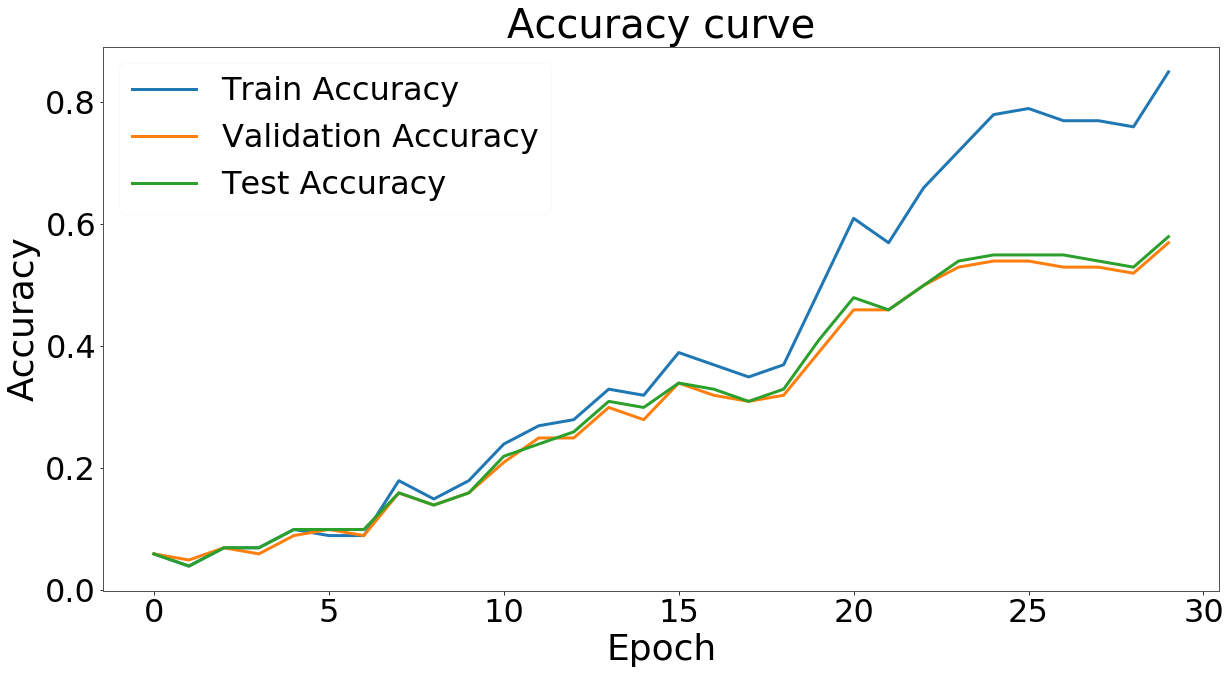

In [388]:
plt.figure(figsize=(20,10))
plt.plot(train, label="Train Accuracy",linewidth=3)
plt.plot(val, label="Validation Accuracy",linewidth=3)
plt.plot(test, label="Test Accuracy",linewidth=3)
plt.title("Accuracy curve")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig("plots/gen_accuracy.png")

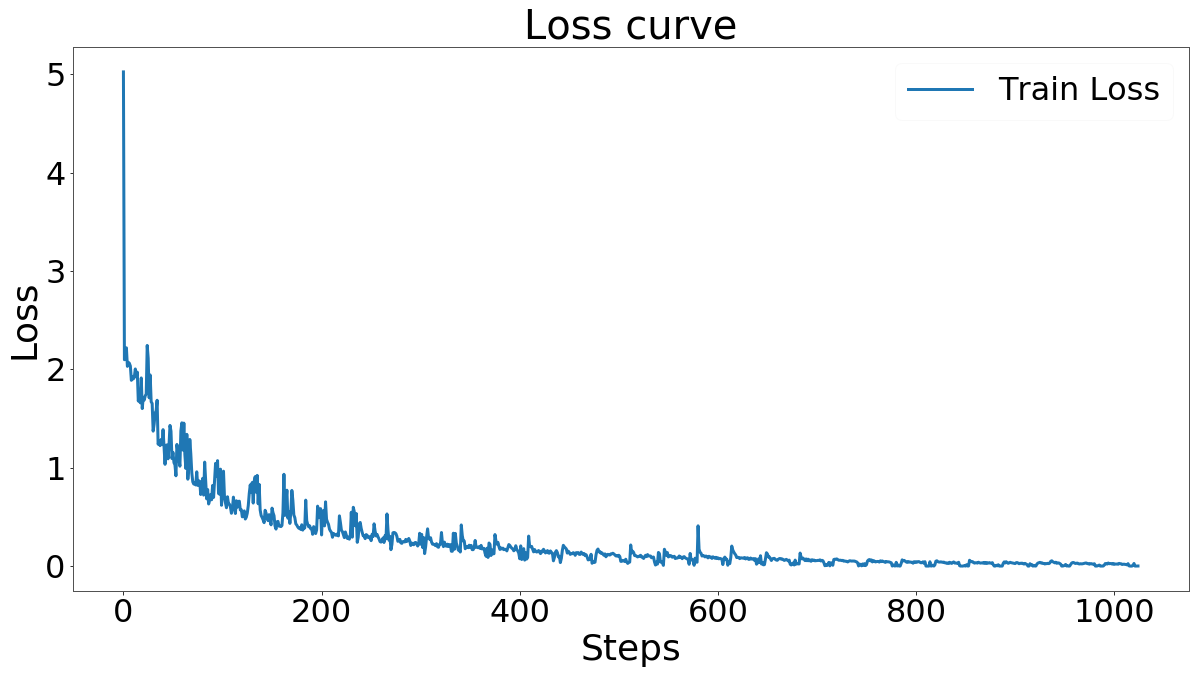

In [389]:
los_len = len(losses[:561])
factor = 17
plt.figure(figsize=(20,10))
plt.plot(losses, label="Train Loss",linewidth=3)
plt.title("Loss curve")
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.savefig("plots/gen_loss.png")

# Error Analysis

In [2]:
file_val = "50_256_0.9/pg_seq_norm_0821_valid.json"
file_test = "50_256_0.9/pg_seq_norm_0821_test.json"
val = pd.read_json(file_val)
test = pd.read_json(file_test)
df = val.append(test)
print(val.shape,test.shape,df.shape)
df.columns = ['index','predicted']
df["eq_len"] = df['predicted'].apply(lambda x :  len(x))
df.head()

(4820, 2) (5864, 2) (10684, 2)


,index,predicted,eq_len
0,948,"[temp_a, temp_b, temp_c, <OP>, <OP>]",5
1,150,"[temp_e, temp_d, <OP>, temp_b, <OP>, temp_c, <OP>]",7
2,1236,"[temp_a, temp_a, <OP>, 1, temp_c, <OP>, <OP>]",7
3,1646,"[temp_b, temp_c, <OP>, temp_d, <OP>]",5
4,788,"[temp_f, 1, temp_a, <OP>, temp_c, <OP>, <OP>]",7


In [4]:
with open("math23k_dolphin.json",'r') as f:
    comb = json.load(f)
comb = pd.read_json(comb)
comb = comb.T
comb["eq_len_gold"] = comb["post_template"].apply(lambda x :  len(x))
comb["index"] = comb.index
# comb = comb.drop(["gen_template","num_position","target_template","numtemp_order"],axis=1)
comb = comb[["post_template","ans","num_list","eq_len_gold","text","index"]]
comb.head()

,post_template,ans,num_list,eq_len_gold,text,index
0,"[temp_b, 1, -, temp_a, *]",20,"[2, 11]",5,镇海 雅乐 学校 二年级 的 小朋友 到 一条 小路 的 一边 植树 ． 小朋友 们 每隔 temp_a 米 种 一棵树 （ 马路 两头 都 种 了 树 ） ， 最后 发现 一共 种 了 temp_b 棵 ， 这 条 小路 长 多少 米 ．,0
1,"[temp_b, temp_d, temp_e, temp_a, -, *, +]",1466,"[1, 316, 2, 230, 6]",7,temp_a 个 工程队 挖土 ， 第一天 挖 了 temp_b 方 ， 从 第 temp_c 天 开始 每天 都 挖 temp_d 方 ， 连续 挖 了 temp_e 天 ， 这个 工程队 一周 共 挖土 多少 方 ？,1
2,"[temp_c, temp_c, temp_e, *, +, 1, temp_a, -, temp_a, temp_e, *, -, temp_f, -, /]",180,"[0.16666666666666666, 2, 24, 3, 1.5, 0.25]",15,小 明 看 一本 故事书 ， 第一天 看 了 全书 的 temp_a ， 第 temp_b 天 看 了 temp_c 页 ， 第 temp_d 天 看 的 页数 是 前两天 看 的 总数 的 temp_e % ， 这时 还有 全书 的 temp_f 没有 看 ， 那么 这 本书 一共 多少 页 ．,2
3,"[temp_a, temp_b, *, temp_c, /]",32,"[16, 4, 2]",5,从 甲地 到 乙地 ， 如果 骑 自行车 每 小时 行驶 temp_a 千米 ， temp_b 小时 可以 到达 ， 如果 乘 汽车 只 需要 temp_c 小时 ， 汽车 每 小时 行驶 多少 千米 ？,3
4,"[temp_a, temp_b, *]",39.76,"[28.4, 1.4]",3,小 刚 的 体重 是 temp_a 千克 ， 小强 的 体重 是 小 刚 的 temp_b 倍 ， 小强 的 体重 = 多少 千克 ？,4


In [230]:
combdf = df.merge(comb)
print(combdf.shape)
# combdf[combdf["eq_len"]==combdf["eq_len_gold"]].shape
combdf.head()

(10684, 8)


,index,predicted,eq_len,post_template,ans,num_list,eq_len_gold,text
0,948,"[temp_a, temp_b, temp_c, <OP>, <OP>]",5,"[temp_a, temp_c, temp_b, +, /, temp_d, *]",275,"[440, 35, 45, 50]",7,甲乙 两站 相距 temp_a 米 ， 一辆 大车 和 一辆 小车 从 两站 相对 开出 ， 大车 每 小时 行 temp_b 千米 ， 小车 每 小时 行 temp_c 千米 ， 一只 燕子 以 每 小时 temp_d 千米 的 速度 和 大车 同时 出发 ， 向 小车 飞去 ， 遇到 小车 又 折回 向 大车 飞去 ， 遇到 大车 又 往回 飞 向 小车 ， 这样 一直 飞下去 ， 燕子 飞 了 多少 千米 两车 才 相遇 ？
1,150,"[temp_e, temp_d, <OP>, temp_b, <OP>, temp_c, <OP>]",7,"[temp_f, temp_d, /, temp_e, *]",36,"[5, 7, 8, 10, 15, 24]",5,甲 、 乙 、 丙 、 丁 、 戊 temp_a 人 拿出 同样 多 的 钱 ， 合伙 订购 同样 规格 的 若干 件 货物 ， 货物 买来 后 ， 甲 、 乙 、 丙 、 丁 分别 比 戊 多 拿 了 temp_b 、 temp_c 、 temp_d 、 temp_e 件 货物 ， 最后 结算 时 ， 丙 付给 戊 temp_f 元 ， 那么 丁 应付 给 戊 多少 元 ．
2,1236,"[temp_a, temp_a, <OP>, 1, temp_c, <OP>, <OP>]",7,"[temp_a, temp_b, /, temp_c, *]",70,"[40, 0.2, 0.35]",5,学校 旁边 的 工地 上 在 修路 ， 卡车 已 运来了 temp_a 吨 沙子 ， 正好 占 了 一天 用 沙量 的 temp_b % ， 为了 赶 工程进度 ， 工人 们 加快 了 修路 的 速度 ， 工地 每天 的 用 沙量 也 增加 了 temp_c % ， 卡车 每天 应 多 运 多少 吨 沙子 ？
3,1646,"[temp_b, temp_c, <OP>, temp_d, <OP>]",5,"[temp_b, temp_a, *, temp_d, temp_c, *, +]",355,"[2, 110, 3, 45]",7,小 李 叔叔 开车 从 A 城 到 B 城 办事 ． 汽车 先 在 高速公路 上 行驶 了 temp_a 小时 ， 每 小时 temp_b 千米 ， 又 在 一般 公路 上 行驶 了 temp_c 小时 ， 每 小时 temp_d 千米 ， 到达 B 城 ． 从 A 城 到 B 城 有 多少 千米 ？
4,788,"[temp_f, 1, temp_a, <OP>, temp_c, <OP>, <OP>]",7,"[temp_d, 1, temp_a, -, temp_c, -, /]",10,"[0.5, 2, 0.25, 2.5]",7,仪征 人民 修建 的 沿江 高速 仪征 段 起 于 著名 席 村 土桥 ， 止 于 风景优美 青山 ． 第一期 修 了 全长 的 temp_a ， 第 temp_b 期 修 了 全长 的 temp_c % ， 还 剩 temp_d 千米 没有 修 ． 沿江 高速 仪征 段 公路 全长 多少 千米 ？


In [193]:
eq_3 = combdf[combdf["eq_len_gold"]==3]
eq_5 = combdf[combdf["eq_len_gold"]==5]
eq_7 = combdf[combdf["eq_len_gold"]==7]
eq_11 = combdf[combdf["eq_len_gold"]==11]
eq_13 = combdf[combdf["eq_len_gold"]==13]
eq_3["operator"] = eq_3["post_template"].apply(lambda x : x[-1])
eq_3_mul = eq_3[eq_3["operator"]=='*']
eq_3_add = eq_3[eq_3["operator"]=='+']
eq_3_sub = eq_3[eq_3["operator"]=='-']
eq_3_div = eq_3[eq_3["operator"]=='/']

In [182]:
def writeFiles(df,name):
    df["output"] = df.apply(lambda x : [str(x["index"])]+[x.predicted],axis=1)
    lst = list(df["output"])
    ans_ = pd.Series(df["ans"].values,index=df["index"]).to_dict()
    
    filename = "error_analysis/"+name+".json"
    with open(filename, 'w') as f:
        json.dump(lst, f)
    fp1 = open('error_analysis/'+name+'_ans', 'w')

    for k,v in ans_.items():
        print(str(k) + '\t' + str(v), file=fp1)

In [183]:
dfs = [eq_3,eq_5,eq_7,eq_11,eq_13,eq_3_mul,eq_3_add,eq_3_sub,eq_3_div]
fnames = ['3','5','7','11','13','3_mul','3_add','3_sub','3_div']
for i in range(len(dfs)):
    writeFiles(dfs[i],fnames[i])

In [187]:
eq_3 = comb[comb["eq_len_gold"]==3]
eq_5 = comb[comb["eq_len_gold"]==5]
eq_7 = comb[comb["eq_len_gold"]==7]
eq_11 = comb[comb["eq_len_gold"]==11]
eq_13 = comb[comb["eq_len_gold"]==13]
eq_3["operator"] = eq_3["post_template"].apply(lambda x : x[-1])
eq_3_mul = eq_3[eq_3["operator"]=='*']
eq_3_add = eq_3[eq_3["operator"]=='+']
eq_3_sub = eq_3[eq_3["operator"]=='-']
eq_3_div = eq_3[eq_3["operator"]=='/']

In [188]:
print(eq_3.shape, eq_5.shape, eq_7.shape, eq_11.shape, eq_13.shape)
print(eq_3_add.shape,eq_3_sub.shape,eq_3_mul.shape,eq_3_div.shape)

((9481, 11), (13851, 10), (5448, 10), (708, 10), (270, 10))

# Stage 1 Analysis

In [5]:
def postfix_equation(equ_list):
    stack = []
    post_equ = []
    op_list = ['+', '-', '*', '/', '^']
    priori = {'^': 3, '*': 2, '/': 2, '+': 1, '-': 1}
    for elem in equ_list:
        if elem == '(':
            stack.append('(')
        elif elem == ')':
            while 1:
                op = stack.pop()
                if op == '(':
                    break
                else:
                    post_equ.append(op)
        elif elem in op_list:
            while 1:
                if not stack:
                    break
                elif stack[-1] == '(':
                    break
                elif priori[elem] > priori[stack[-1]]:
                    break
                else:
                    op = stack.pop()
                    post_equ.append(op)
            stack.append(elem)
        else:
            post_equ.append(elem)
    while stack:
        post_equ.append(stack.pop())
    return post_equ

def post_solver(post_equ):
    try:
        stack = [] 
        op_list = ['+', '-', '/', '*', '^']
        for elem in post_equ:
            if elem not in op_list:
                op_v = elem
                if '%' in op_v:
                    op_v = float(op_v[:-1])/100.0
                stack.append(str(op_v))
            elif elem in op_list:
                op_v_1 = stack.pop()
                op_v_1 = float(op_v_1)
                op_v_2 = stack.pop()
                op_v_2 = float(op_v_2)
                if elem == '+':
                    stack.append(str(op_v_2+op_v_1))
                elif elem == '-':
                    stack.append(str(op_v_2-op_v_1))
                elif elem == '*':
                    stack.append(str(op_v_2*op_v_1))
                elif elem == '/':
                    if op_v_1 == 0:
                        return nan
                    stack.append(str(op_v_2/op_v_1))
                else:
                    stack.append(str(op_v_2**op_v_1))
        return stack.pop()
    except:
#         print(post_equ)
        return None
def getAns(eqn,num_list):
    try:
        alphabets = 'abcdefghijklmnopqrstuvwxyz'
        neweq = []
        for i in range(len(eqn)):
            elem = eqn[i]
            if elem == 'PI':
                neweq.append('3.14')
            elif 'temp' in elem:
                neweq.append(str(num_list[alphabets.find(elem[-1])]))
            else:
                neweq.append(elem)
        return post_solver(neweq)
    except:
        return None
    
def accCheck(pred,gold):
    p = ','.join(pred)
    g = ','.join(gold)
    if(p==g):
        return True
    else:
        return False
def ansCheck(pred,gold,ind):
    try:
        p = round(float(pred),2)
        g = round(float(gold),2)
        if(p==g):
            return True
        return False
    except:
        return False
def ansCheck2(pred,gold,ind,ans_check,acc_check):
    if(ans_check==False and acc_check==True):
        try:
            p = round(float(pred),4)
            g = round(float(gold),4)
            if(abs(g-p*100)<1e-5 and abs(g-p*100)>=0):
                return True
            elif(abs(g-p)<1e-5 and abs(g-p)>=0):
                return True
            return False
        except:
            return False
    else:
        return ans_check

In [12]:
# file = "58/pg_seq_norm_0821_train.json"
# file = "58/pg_seq_norm_0821_valid.json"
file = "58/pg_seq_norm_0821_test.json"
df = pd.read_json(file)
df.columns = ['index','predicted']
df["eq_len"] = df['predicted'].apply(lambda x :  len(x))
df = df.merge(comb)
df["predicted_ans"] = df.apply(lambda x : getAns(x["predicted"],x["num_list"]),axis=1)
df["acc_check"] = df.apply(lambda x : accCheck(x["predicted"],x["post_template"]),axis=1) 
df["ans_check"] = df.apply(lambda x : ansCheck(x["predicted_ans"],x["ans"],x["index"]),axis=1) 
df["ans_check"] = df.apply(lambda x : ansCheck2(x["predicted_ans"],x["ans"],x["index"],x["ans_check"],x["acc_check"]),axis=1) 
df = df[["index","predicted","eq_len","post_template","eq_len_gold","predicted_ans","ans","text","acc_check","ans_check","num_list"]]
# df.head()

In [373]:
correct = df[(df["ans_check"]==True)&(df["acc_check"]==False)]
print(correct.shape)

(268, 11)


In [374]:
correct = df[df["ans_check"]==True]
correct.shape,df.shape,correct.shape[0]/df.shape[0]

((3628, 11), (5864, 11), 0.6186903137789904)

In [377]:
eq_3 = df[df["eq_len_gold"]==3]
eq_5 = df[df["eq_len_gold"]==5]
eq_7 = df[df["eq_len_gold"]==7]
eq_11 = df[df["eq_len_gold"]==11]
eq_13 = df[df["eq_len_gold"]==13]
eq_3["operator"] = eq_3["post_template"].apply(lambda x : x[-1])
eq_3_mul = eq_3[eq_3["operator"]=='*']
eq_3_add = eq_3[eq_3["operator"]=='+']
eq_3_sub = eq_3[eq_3["operator"]=='-']
eq_3_div = eq_3[eq_3["operator"]=='/']

In [380]:
dfs = [eq_3,eq_5,eq_7,eq_11,eq_13,eq_3_mul,eq_3_add,eq_3_sub,eq_3_div]
fnames = ['3','5','7','11','13','3_mul','3_add','3_sub','3_div']
for i in range(len(dfs)):
    temp = dfs[i]
    total = temp.shape[0]
    corr =  temp[temp["ans_check"]==True].shape[0]
    print("Analysis for ",fnames[i])
    print("Total: ",total,"Correct: ",corr,"Score: ",corr/total)

Analysis for  3
Total:  1705 Correct:  1414 Score:  0.829325513196481
Analysis for  5
Total:  2528 Correct:  1572 Score:  0.6218354430379747
Analysis for  7
Total:  966 Correct:  382 Score:  0.39544513457556935
Analysis for  11
Total:  122 Correct:  21 Score:  0.1721311475409836
Analysis for  13
Total:  49 Correct:  1 Score:  0.02040816326530612
Analysis for  3_mul
Total:  579 Correct:  497 Score:  0.8583765112262521
Analysis for  3_add
Total:  127 Correct:  84 Score:  0.6614173228346457
Analysis for  3_sub
Total:  258 Correct:  220 Score:  0.8527131782945736
Analysis for  3_div
Total:  721 Correct:  593 Score:  0.8224687933425797


In [394]:
text = ','.join(eq_3_div["text"].values)
data_set = text
from collections import Counter 
split_it = data_set.split() 
Counter = Counter(split_it) 
most_occur = Counter.most_common(30) 
  
print(most_occur) 

[('temp_b', 713), ('，', 614), ('temp_a', 530), ('temp_c', 455), ('的', 376), ('a', 240), ('多少', 238), ('是', 214), ('temp_d', 166), ('percent', 128), ('%', 119), ('了', 100), ('=', 96), ('temp_e', 90), ('divided', 88), ('米', 87), ('个', 87), ('please', 86), ('有', 78), ('元', 76), ('．', 75), ('？,temp_a', 72), ('．,temp_a', 71), ('千克', 71), ('got', 69), ('help', 66), ('pieces', 63), ('would', 61), ('problem', 60), ('temp_f', 57)]


# Predictor Analysis

In [64]:
df = pd.read_json("04pred.json")
df = df.rename({'idx':'index'},axis=1)

In [65]:
df["new"] = df.apply(lambda x : [x.pred_post_eq]+[x.gold_post_equ],axis=1)
eqns = df["new"]

In [66]:
c=0
store = {}
for i in range(len(ops)):
    for j in range(len(ops)):
        st = ops[i]+ops[j]
        store[st]=0
ops = ['+','-','*','/']
for el in eqns:
    pred = el[0]
    gold = el[1]
    if(len(pred)!=len(gold)):
        continue
    for i in range(len(pred)):
        if ((pred[i] in ops and gold[i] not in ops) or (pred[i] not in ops and gold[i] in ops)):
            continue
        if pred[i] not in ops:
            continue
        st = gold[i]+pred[i]
        store[st]+=1

In [67]:
store

{'++': 1854,
 '+-': 99,
 '+*': 45,
 '+/': 15,
 '-+': 167,
 '--': 1711,
 '-*': 58,
 '-/': 17,
 '*+': 50,
 '*-': 34,
 '**': 2750,
 '*/': 26,
 '/+': 45,
 '/-': 20,
 '/*': 86,
 '//': 2341}